In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned.head()

,category_id,comments_disabled,ratings_disabled,video_error_or_removed,region,timetotrend,hour,tag_counts,log_views,log_likes,log_dislikes,log_comments
0,28,0,0,0,Great Britan,7,16,14,13.407891,8.777247,6.570883,7.822845
1,25,0,0,0,Great Britan,7,17,44,10.871175,6.912743,3.931826,4.882802
2,22,0,0,0,Great Britan,12,20,6,12.983917,8.515992,5.204007,5.278115
3,22,0,0,0,Great Britan,3,7,27,13.478176,8.599326,7.863651,8.277158
4,22,0,0,0,Great Britan,8,16,16,10.732607,7.580700,3.555348,4.859812


In [3]:
#All distinct regions
countries = data_cleaned['region'].unique()
countries 

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

In [4]:
pd.options.display.float_format = '{:.2f}'.format

# LINEAR REGRESSION MODEL (GLOBAL)

### Declare the inputs & target

In [5]:
# The target(s) (dependent variable) is 'log_views'
targets = data_cleaned['log_comments']

# The inputs are everything BUT the dependent variable & 'region', so we can simply drop it
inputs = data_cleaned.drop(['log_comments' , 'region'],axis=1)

### Scale the data

In [6]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [7]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split everytime, random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the Regression

In [8]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Storing the outputs(the predictions) of the regression 
y_hat = reg.predict(x_train)

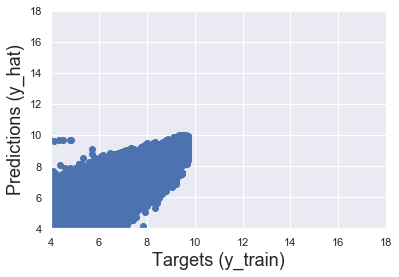

In [10]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

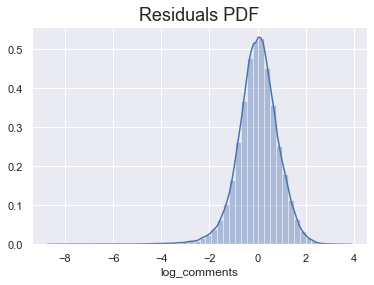

In [11]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

### Summary , Weights & Bias

In [12]:
x1=sm.add_constant(x_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_comments   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 9.432e+04
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        15:08:03   Log-Likelihood:            -2.6395e+05
No. Observations:              211925   AIC:                         5.279e+05
Df Residuals:                  211916   BIC:                         5.280e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6582      0.002   3098.045      0.000       5.655       5.662
x1             0.0311      0.002     16.746      0.000       0.027       0.035
x2              3e-16   1.61e-18    186.700      0.000    2.97e-16    3.03e-16
x3          3.597e-17   9.33e-19     38.571      0.000    3.41e-17    3.78e-17
x4             0.0027      0.002      1.435      0.151      -0.001       0.006
x5             0.0051      0.002      2.429      0.015       0.001       0.009
x6             0.0152      0.002      8.248      0.000       0.012       0.019
x7             0.0169      0.002      9.085      0.000       0.013       0.021
x8            -0.0716      0.004    -17.714      0.000      -0.080      -0.064
x9             1.2015      0.003    375.501      0.000       1.195       1.208
x10            0.5278      0.004    139.792      0.000       0.520       0.535
==============================================================================
Omnibus:                    20626.694   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56658.418
Skew:                          -0.548   Prob(JB):                         0.00
Kurtosis:                       5.284   Cond. No.                     1.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### OBSERVATION
R-squared(=0.781) measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model.

In [13]:
# Obtain the bias (intercept) of the regression
reg.intercept_

5.658170248928168

In [14]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([ 3.11238065e-02,  0.00000000e+00, -5.55111512e-17,  2.67443368e-03,
        5.10659213e-03,  1.52222579e-02,  1.68757313e-02, -7.16279032e-02,
        1.20151000e+00,  5.27773182e-01])

In [15]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_ # Weights - Regression Coefficients
reg_summary

,Features,Weights
0,category_id,0.03
1,comments_disabled,0.00
2,ratings_disabled,-0.00
3,video_error_or_removed,0.00
4,timetotrend,0.01
5,hour,0.02
6,tag_counts,0.02
7,log_views,-0.07
8,log_likes,1.20
9,log_dislikes,0.53


#### OBSERVATION
1. Higher the absolute value of weight(regression coefficient) of a feature , higher is its influence on the target.

### TESTING

In [16]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# If the predictions are far off, we will know that our model overfitted

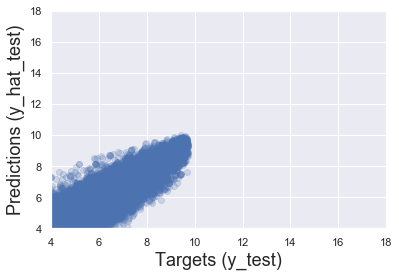

In [17]:
y_hat_test = reg.predict(x_test) #testing

# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

In [18]:
# Finally, let's manually check these predictions
# To obtain the actual views, we take the exponential of the log_views
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

#reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

#we need the exponential of the test log views
df_pf['Target'] = np.exp(y_test)

# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,268.58,580.00,311.42,53.69
1,724.74,674.00,-50.74,7.53
2,2966.01,5478.00,2511.99,45.86
3,71.60,152.00,80.40,52.89
4,239.25,183.00,-56.25,30.74


Text(0.5, 1.0, 'Residuals PDF')

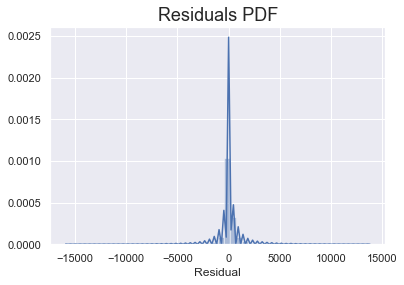

In [19]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(df_pf['Residual'])

# Include a title
plt.title("Residuals PDF", size=18)

In [20]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,52982.00,52982.00,52982.00,52982.00
mean,871.99,995.92,123.93,134.38
std,1649.95,1833.89,977.54,3792.37
min,1.02,1.00,-15836.63,0.00
25%,93.73,92.00,-91.65,23.09
50%,301.04,342.00,3.44,47.19
75%,884.84,1024.75,197.32,76.44
max,21384.13,16565.00,13720.09,748580.31


# Comparison of Regression Coefficients of Country-Wise Linear Regression

In [21]:
data_cleaned = data_cleaned.drop(['ratings_disabled' , 'comments_disabled' , 'tag_counts' , 'video_error_or_removed'],axis=1)

In [22]:
intercept=[]
coeff_views=[]
coeff_likes=[]
coeff_dislikes=[]
coeff_categoryid=[]
coeff_timetotrend=[]
coeff_hour=[]
coeff_tagcounts=[]

def linear_regression(select):
    #Initializing data
    targets = select['log_comments']
    inputs = select.drop(['log_comments' , 'region'],axis=1)
    
    #Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit(inputs_scaled,targets)
    
    intercept.append(reg.intercept_)
    coeff_categoryid.append(reg.coef_[0])
    coeff_timetotrend.append(reg.coef_[1])
    coeff_hour.append(reg.coef_[2])
    coeff_views.append(reg.coef_[3])
    coeff_likes.append(reg.coef_[4])
    coeff_dislikes.append(reg.coef_[5])

In [23]:
for i in countries:
    select = data_cleaned.loc[data_cleaned['region']==i] #Selects all rows of a particular country
    linear_regression(select)

In [24]:
def Compare(l,l_name):
    
    K=[]
    for i in range(0,len(countries)):
        K.append(i)
        
    plt.plot(K,l)
    plt.xlabel('Countries',fontsize=15)
    plt.ylabel(l_name,fontsize=15)
    plt.title('Country-Wise ' + l_name ,fontsize=20)
    plt.xticks(K,countries,rotation=30, horizontalalignment='right')
    plt.show()

In [25]:
plt.rc('figure', figsize=(6, 3), dpi=100)

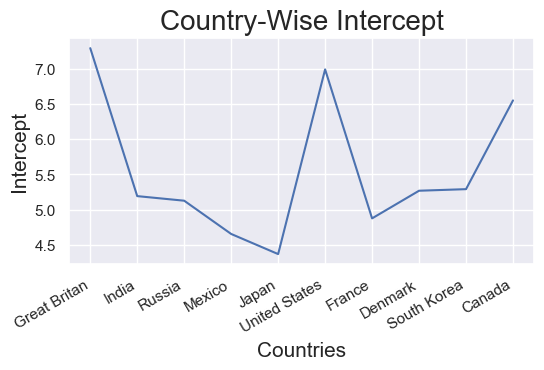

In [26]:
Compare(intercept,'Intercept')

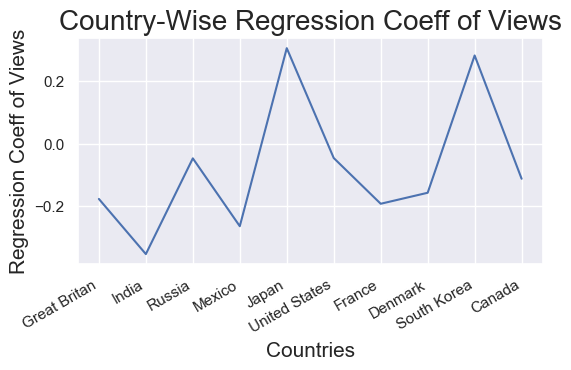

In [27]:
Compare(coeff_views,'Regression Coeff of Views')

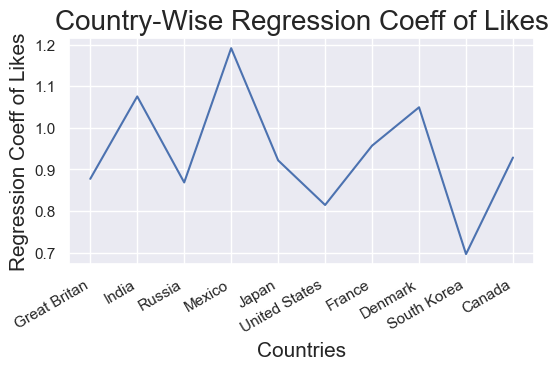

In [28]:
Compare(coeff_likes,'Regression Coeff of Likes')

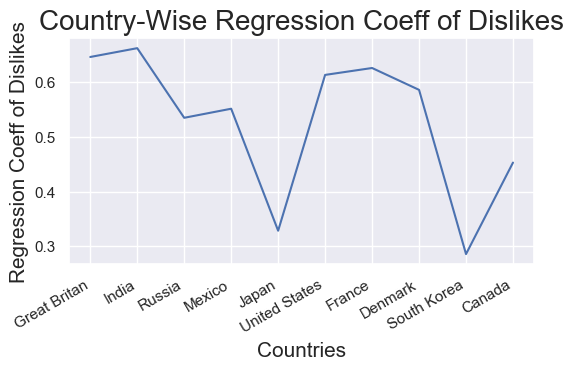

In [29]:
Compare(coeff_dislikes,'Regression Coeff of Dislikes')

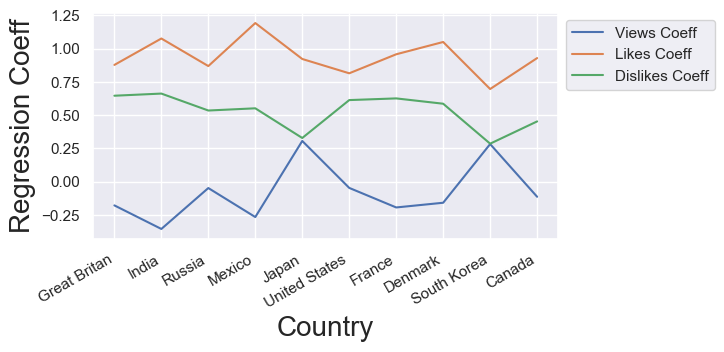

In [30]:
K=[]
for i in range(0,len(countries)):
    K.append(i)
plt.plot(K,coeff_views, label = "Views Coeff")
plt.plot(K,coeff_likes,label= "Likes Coeff")
plt.plot(K,coeff_dislikes,label= "Dislikes Coeff")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Regression Coeff',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

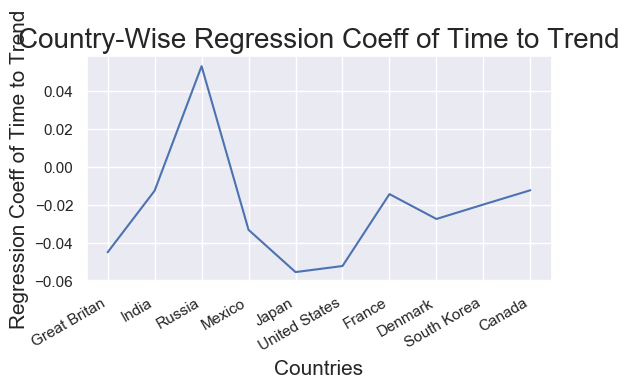

In [31]:
Compare(coeff_timetotrend,'Regression Coeff of Time to Trend')

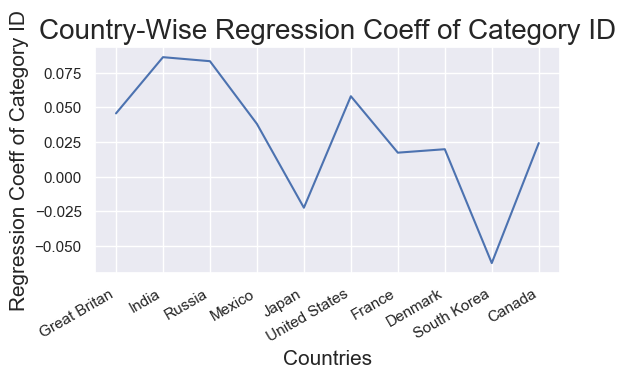

In [32]:
Compare(coeff_categoryid,'Regression Coeff of Category ID')

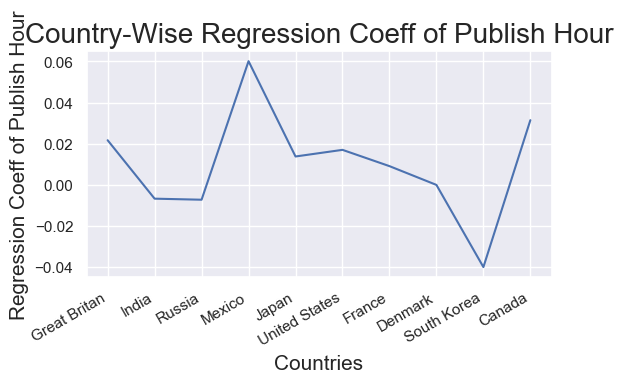

In [33]:
Compare(coeff_hour,'Regression Coeff of Publish Hour')

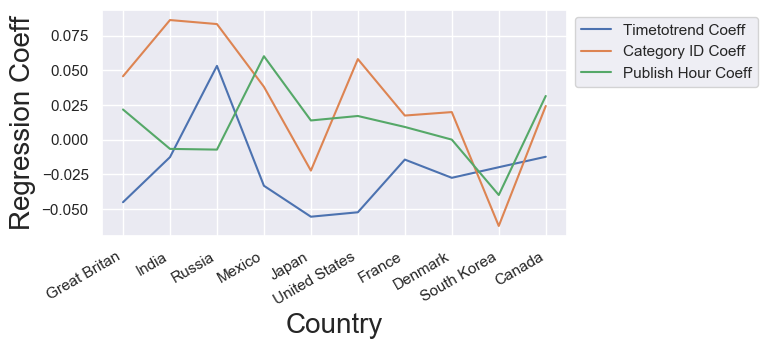

In [34]:
plt.plot(K,coeff_timetotrend, label = "Timetotrend Coeff")
plt.plot(K,coeff_categoryid,label= "Category ID Coeff")
plt.plot(K,coeff_hour,label= "Publish Hour Coeff")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Regression Coeff',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# CONFIG

In [35]:
config = [ [50,50] , [60,40], [70,30], [80,20] , [90,10] ]

In [36]:
from sklearn import metrics

In [37]:
mean_absolute = []
mean_squared = []
root_mean_squared = []
def config_test(c):
    testsize = c/100
    
    data_config = pd.get_dummies(data_cleaned, drop_first=True)
    
    #Initializing data
    targets = data_config['log_comments']
    inputs = data_config.drop(['log_comments'],axis=1)
    
    #Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    
    #TrainTestSplit
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=c, random_state=365)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit( x_train,y_train)
    
    predicted = reg.predict(x_test)
      
    mean_absolute.append( metrics.mean_absolute_error(y_test, predicted))
    mean_squared.append(metrics.mean_squared_error(y_test, predicted))
    root_mean_squared.append(np.sqrt(metrics.mean_squared_error(y_test,predicted)))

In [38]:
for i in config:
    config_test(i[1])

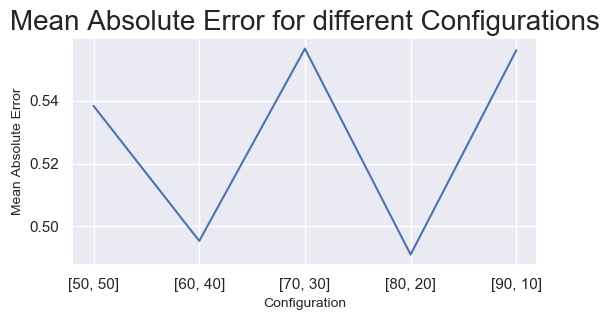

In [39]:
K = [1,2,3,4,5]
plt.plot(K,mean_absolute)
plt.xlabel('Configuration' , fontsize=10)
plt.ylabel('Mean Absolute Error',fontsize=10)
plt.title('Mean Absolute Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

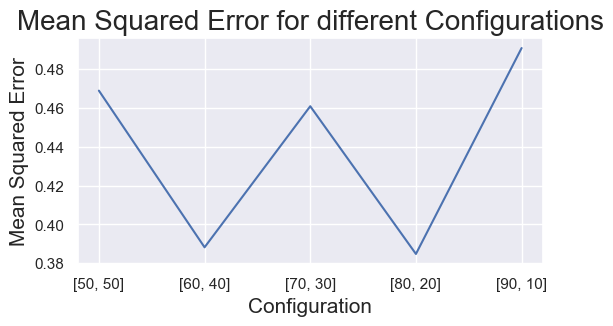

In [40]:
K = [1,2,3,4,5]
plt.plot(K,mean_squared)
plt.xlabel('Configuration' , fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('Mean Squared Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

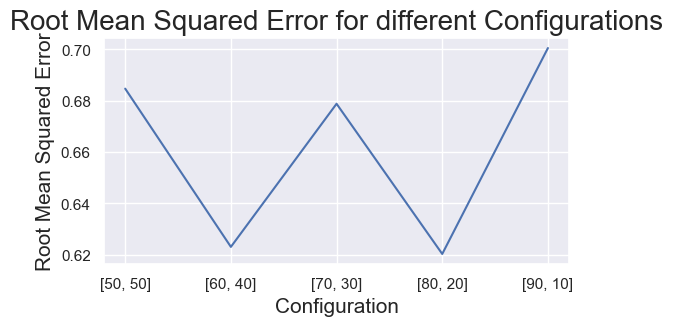

In [41]:
K = [1,2,3,4,5]
plt.plot(K,root_mean_squared)
plt.xlabel('Configuration' , fontsize=15)
plt.ylabel('Root Mean Squared Error',fontsize=15)
plt.title('Root Mean Squared Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

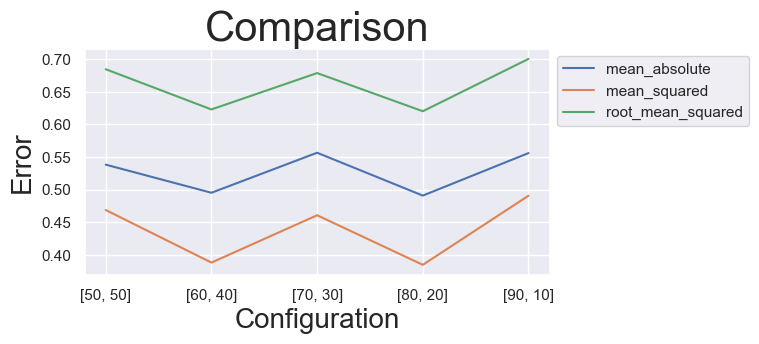

In [42]:
plt.plot(K,mean_absolute, label = "mean_absolute")
plt.plot(K,mean_squared,label= "mean_squared")
plt.plot(K,root_mean_squared,label= "root_mean_squared")
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.title("Comparison",fontsize=30)
plt.xticks(K,config)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()